# In this notebook, we are going to use *BeatutifulSoup* to do some web scraping. Follow me, it's very cool!

In [107]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [108]:
url = 'https://de.wikipedia.org/wiki/Verwaltungsgliederung_Berlins'
data  = requests.get(url).text 

In [109]:
soup = BeautifulSoup(data, 'html5lib')

In [110]:
table = soup.find('table')
table_rows = table.find_all('tr')
# print(table_rows)

In [111]:
table_contents=[]
for i in range(1,len(table_rows)):
    row = table_rows[i].findAll('td')
    cell = {}
    cell['Borough'] = row[1].b.span.text.strip('\n')
    if i < 10:
         cell['Neighborhood'] = row[2].text.replace('0'+str(i)+'01 ','').replace('0'+str(i)+'02 ',', ').replace('0'+str(i)+'03 ',', ').replace('0'+str(i)+'04 ',', ').replace('0'+str(i)+'05 ',', ').replace('0'+str(i)+'06 ',', ').replace('0'+str(i)+'07 ',', ').replace('0'+str(i)+'08 ',', ').replace('0'+str(i)+'09 ',', ').replace('0'+str(i)+'10 ',', ').replace('0'+str(i)+'11 ',', ').replace('0'+str(i)+'12 ',', ').replace('0'+str(i)+'13 ',', ').replace('0'+str(i)+'14 ',', ').replace('0'+str(i)+'15 ',', ').strip('\n')
    else:
         cell['Neighborhood'] = row[2].text.replace(str(i)+'01 ','').replace(str(i)+'02 ',', ').replace(str(i)+'03 ',', ').replace(str(i)+'04 ',', ').replace(str(i)+'05 ',', ').replace(str(i)+'06 ',', ').replace(str(i)+'07 ',', ').replace(str(i)+'08 ',', ').replace(str(i)+'09 ',', ').replace(str(i)+'10 ',', ').replace(str(i)+'11 ',', ').replace(str(i)+'12 ',', ').replace(str(i)+'13 ',', ').replace(str(i)+'14 ',', ').replace(str(i)+'15 ',', ').strip('\n')
    cell['Area'] = row[3].text.strip('\n').replace(',', '')
    cell['Population'] = row[4].text.strip('\n').replace(',', '')
    cell['Density'] = row[5].text.strip('\n').replace(',', '')
    table_contents.append(cell)

# print(table_contents)
df = pd.DataFrame(table_contents)
df[['Population','Area','Density']] = df[['Population','Area','Density']].astype(float)
df

,Borough,Neighborhood,Area,Population,Density
0,Mitte,"Mitte, Moabit, Hansaviertel, Tiergarten, Weddi...",3947.0,385.748,9.773
1,Friedrichshain-Kreuzberg,"Friedrichshain, Kreuzberg",2016.0,290.386,14.404
2,Pankow,"Prenzlauer Berg, Weißensee, Blankenburg, Heine...",10301.0,409.335,3.974
3,Charlottenburg-Wilmersdorf,"Charlottenburg, Wilmersdorf, Schmargendorf, Gr...",6472.0,343.592,5.309
4,Spandau,"Spandau, Haselhorst, Siemensstadt, Staaken, Ga...",9191.0,245.197,2.668
5,Steglitz-Zehlendorf,"Steglitz, Lichterfelde, Lankwitz, Zehlendorf, ...",10250.0,310.071,3.025
6,Tempelhof-Schöneberg,"Schöneberg, Friedenau, Tempelhof, Mariendorf, ...",5309.0,350.984,6.611
7,Neukölln,"Neukölln, Britz, Buckow, Rudow, Gropiusstadt",4493.0,329.917,7.343
8,Treptow-Köpenick,"Alt-Treptow, Plänterwald, Baumschulenweg, Joha...",16842.0,273.689,1.625
9,Marzahn-Hellersdorf,"Marzahn, Biesdorf, Kaulsdorf, Mahlsdorf, Helle...",6174.0,269.967,4.373


In [112]:
Berlin = df['Borough'].to_frame()
Berlin = Berlin.append({'Borough':'Berlin'},ignore_index=True)
Berlin

,Borough
0,Mitte
1,Friedrichshain-Kreuzberg
2,Pankow
3,Charlottenburg-Wilmersdorf
4,Spandau
5,Steglitz-Zehlendorf
6,Tempelhof-Schöneberg
7,Neukölln
8,Treptow-Köpenick
9,Marzahn-Hellersdorf


In [113]:
Berlin = Berlin.values.tolist()

In [114]:
flat = []
for i in range(0,len(Berlin)):
      flat += Berlin[i] 
Berlin = flat
Berlin

['Mitte',
 'Friedrichshain-Kreuzberg',
 'Pankow',
 'Charlottenburg-Wilmersdorf',
 'Spandau',
 'Steglitz-Zehlendorf',
 'Tempelhof-Schöneberg',
 'Neukölln',
 'Treptow-Köpenick',
 'Marzahn-Hellersdorf',
 'Lichtenberg',
 'Reinickendorf',
 'Berlin']

In [115]:
Berlin_Mieten = pd.DataFrame([[13.70, 13.11, 10.50, 12.38, 8.53, 10.31, 9.97, 9.38, 10.19, 8.02, 9.08, 8.84, 10.14],
                      [13.45, 13.01, 10.96, 12.63, 8.86, 10.70, 10.52, 10.10, 9.93, 7.90, 9.27, 9.42, 10.45],
                      [12.51, 12.94, 10.97, 12.00, 8.59, 10.44, 10.30, 10.00, 9.62, 7.77, 9.53, 9.17, 10.32],
                      [12.77, 12.50, 10.86, 11.86, 7.95, 10.00, 9.97, 10.00, 9.16, 7.16, 9.72, 8.73, 10.15],
                      [10.51, 11.50, 9.99, 10.53, 7.35, 9.38, 9.00, 9.00, 8.24, 6.51, 8.80, 8.00, 9.07],
                      [10.06, 10.99, 9.45, 10.00, 6.99, 8.87, 8.50, 8.57, 7.81, 5.76, 8.10, 7.50, 8.80],
                      [9.36, 9.98, 8.99, 9.49, 6.58, 8.50, 8.01, 7.73, 7.12, 5.80, 7.50, 6.92, 8.25],
                      [9.39, 9.64, 8.56, 9.86, 6.48, 8.50, 8.00, 7.33, 7.08, 5.55, 7.01, 6.86, 8.05],
                      [8.03, 8.61, 8.00, 8.93, 5.93, 7.99, 7.49, 6.70, 6.55, 5.08, 6.53, 6.31, 7.40],
                      [6.18, 7.00, 6.73, 7.53, 5.28, 6.88, 6.23, 5.57, 5.80, 4.85, 5.65, 5.49, 6.17],
                      [5.37, 6.42, 6.13, 6.56, 5.26, 6.29, 5.84, 5.19, 5.55, 4.86, 5.51, 5.26, 5.82]],
                      columns=Berlin)
Berlin_Mieten['Year'] = [2020-i for i in range(0,9)]+[2010,2009]
new_columns = ['Year'] + Berlin
Berlin_Mieten = Berlin_Mieten[new_columns].sort_values(['Year'],ascending=True).reset_index(drop=True)
Berlin_Mieten

,Year,Mitte,Friedrichshain-Kreuzberg,Pankow,Charlottenburg-Wilmersdorf,Spandau,Steglitz-Zehlendorf,Tempelhof-Schöneberg,Neukölln,Treptow-Köpenick,Marzahn-Hellersdorf,Lichtenberg,Reinickendorf,Berlin
0,2009,5.37,6.42,6.13,6.56,5.26,6.29,5.84,5.19,5.55,4.86,5.51,5.26,5.82
1,2010,6.18,7.00,6.73,7.53,5.28,6.88,6.23,5.57,5.80,4.85,5.65,5.49,6.17
2,2012,8.03,8.61,8.00,8.93,5.93,7.99,7.49,6.70,6.55,5.08,6.53,6.31,7.40
3,2013,9.39,9.64,8.56,9.86,6.48,8.50,8.00,7.33,7.08,5.55,7.01,6.86,8.05
4,2014,9.36,9.98,8.99,9.49,6.58,8.50,8.01,7.73,7.12,5.80,7.50,6.92,8.25
5,2015,10.06,10.99,9.45,10.00,6.99,8.87,8.50,8.57,7.81,5.76,8.10,7.50,8.80
6,2016,10.51,11.50,9.99,10.53,7.35,9.38,9.00,9.00,8.24,6.51,8.80,8.00,9.07
7,2017,12.77,12.50,10.86,11.86,7.95,10.00,9.97,10.00,9.16,7.16,9.72,8.73,10.15
8,2018,12.51,12.94,10.97,12.00,8.59,10.44,10.30,10.00,9.62,7.77,9.53,9.17,10.32
9,2019,13.45,13.01,10.96,12.63,8.86,10.70,10.52,10.10,9.93,7.90,9.27,9.42,10.45


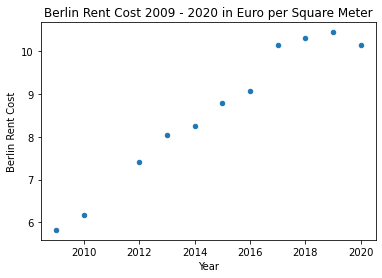

In [116]:
fig = Berlin_Mieten.plot(kind='scatter', x='Year', y='Berlin')
fig.set_title('Berlin Rent Cost 2009 - 2020 in Euro per Square Meter')
fig.set_xlabel('Year')
fig.set_ylabel('Berlin Rent Cost')
plt.show()

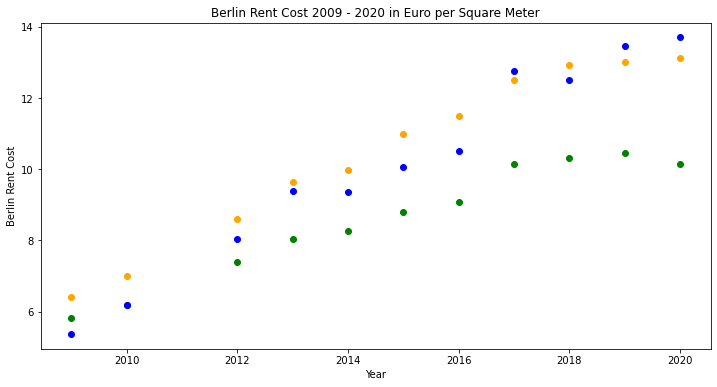

In [117]:
plt.figure(figsize = (12,6))
plt.scatter(Berlin_Mieten['Year'], Berlin_Mieten["Berlin"],  color='green')
plt.scatter(Berlin_Mieten['Year'], Berlin_Mieten["Mitte"],  color='blue')
plt.scatter(Berlin_Mieten['Year'], Berlin_Mieten["Friedrichshain-Kreuzberg"],  color='orange')
plt.title('Berlin Rent Cost 2009 - 2020 in Euro per Square Meter')
plt.xlabel('Year')
plt.ylabel('Berlin Rent Cost')
plt.show()

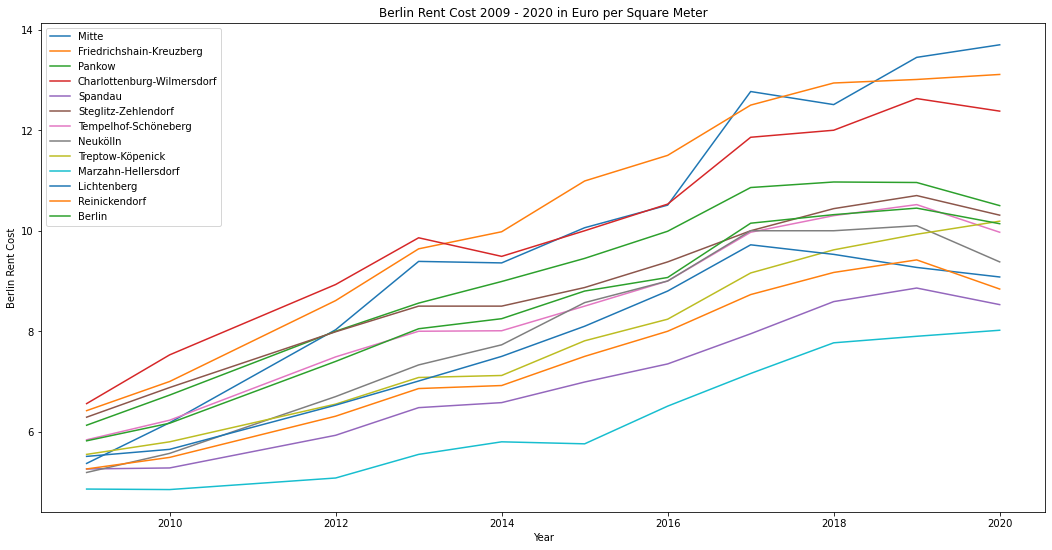

In [118]:
plt.figure(figsize = (18,9))
plt.plot(Berlin_Mieten['Year'], Berlin_Mieten[Berlin])
plt.title('Berlin Rent Cost 2009 - 2020 in Euro per Square Meter')
plt.xlabel('Year')
plt.ylabel('Berlin Rent Cost')
plt.legend(Berlin)
plt.show()

In [119]:
from sklearn import linear_model
x = np.asanyarray(Berlin_Mieten[['Year']])
y_B = np.asanyarray(Berlin_Mieten[['Berlin']])
y_M = np.asanyarray(Berlin_Mieten[['Mitte']])
y_FK = np.asanyarray(Berlin_Mieten[['Friedrichshain-Kreuzberg']])
regr_Berlin = linear_model.LinearRegression().fit (x, y_B)
regr_Mitte = linear_model.LinearRegression().fit (x, y_M)
regr_FK = linear_model.LinearRegression().fit (x, y_FK)

# The coefficients
print ('Coefficients: ', regr_Berlin.coef_)
print ('Intercept: ',regr_Berlin.intercept_)

Coefficients:  [[0.44519635]]
Intercept:  [-888.3878892]


Text(0, 0.5, 'Berlin Rent')

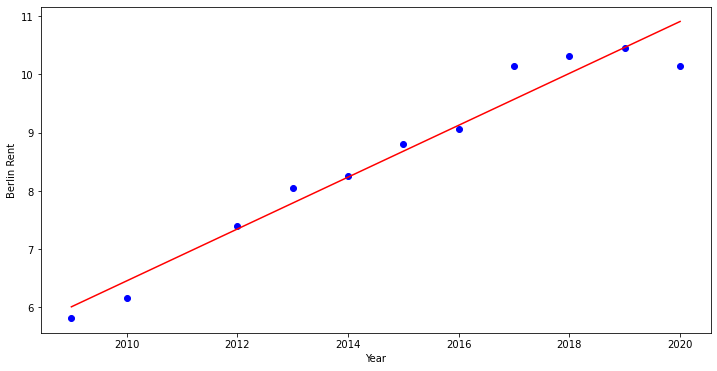

In [120]:
plt.figure(figsize = (12,6))
plt.scatter(Berlin_Mieten.Year, Berlin_Mieten.Berlin,  color='blue')
plt.plot(x, regr_Berlin.coef_[0][0]*x + regr_Berlin.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Berlin Rent")

Text(0, 0.5, 'Berlin-Mitte Rent')

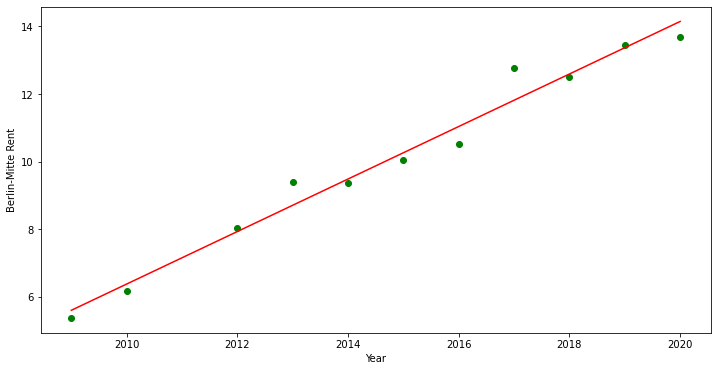

In [121]:
plt.figure(figsize = (12,6))
plt.scatter(Berlin_Mieten.Year, Berlin_Mieten.Mitte,  color='green')
plt.plot(x, regr_Mitte.coef_[0][0]*x + regr_Mitte.intercept_[0], '-r')
plt.xlabel("Year")
plt.ylabel("Berlin-Mitte Rent")

Text(0, 0.5, 'Berlin-Friedrichshain-Kreuzberg Rent')

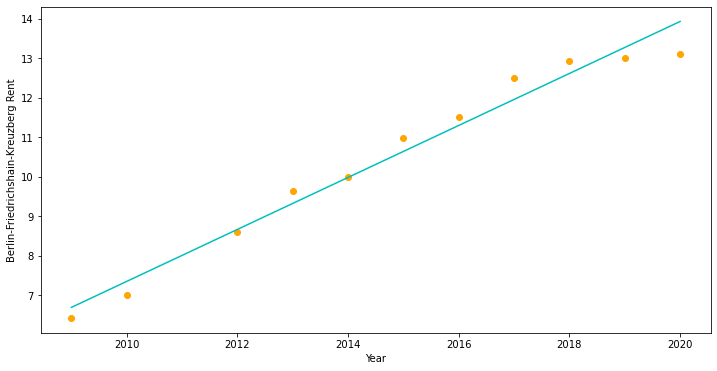

In [122]:
plt.figure(figsize = (12,6))
plt.scatter(Berlin_Mieten.Year, Berlin_Mieten['Friedrichshain-Kreuzberg'],  color='orange')
plt.plot(x, regr_FK.coef_[0][0]*x + regr_FK.intercept_[0], '-c')
plt.xlabel("Year")
plt.ylabel("Berlin-Friedrichshain-Kreuzberg Rent")

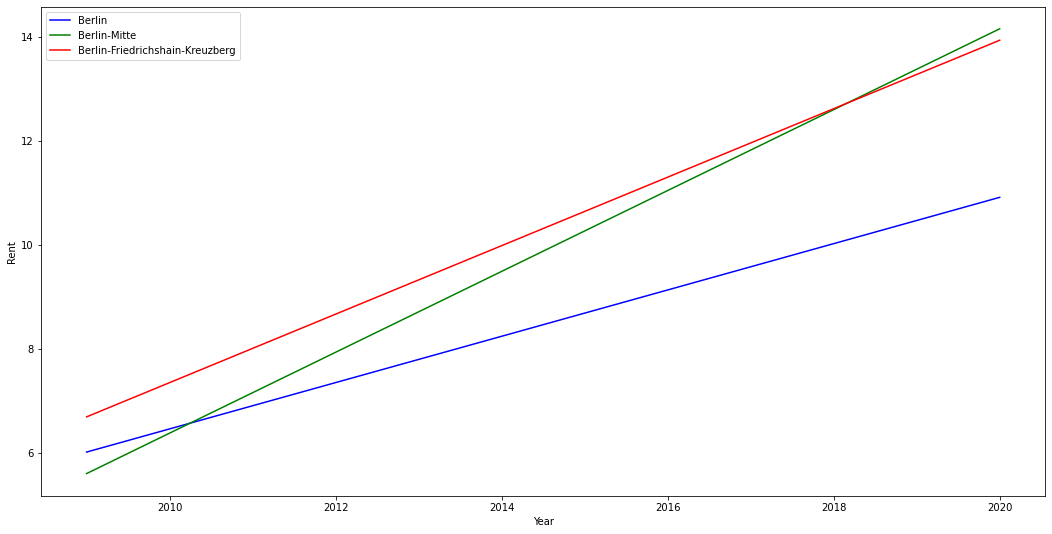

In [123]:
plt.figure(figsize = (18,9))
plt.plot(x, regr_Berlin.coef_[0][0]*x + regr_Berlin.intercept_[0], '-b', label='Berlin')
plt.plot(x, regr_Mitte.coef_[0][0]*x + regr_Mitte.intercept_[0], '-g', label='Berlin-Mitte')
plt.plot(x, regr_FK.coef_[0][0]*x + regr_FK.intercept_[0], '-r', label='Berlin-Friedrichshain-Kreuzberg')
plt.xlabel("Year")
plt.ylabel("Rent")
plt.legend()
plt.show()

In [124]:
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [125]:
geolocator = Nominatim(user_agent="ny_explorer")
Position = []
for i in range(0,len(Berlin)):
                 location = geolocator.geocode(Berlin[i]+', Berlin')
                 latitude = location.latitude
                 longitude = location.longitude
                 Position.append({'Borough':Berlin[i], 'Latitude':latitude, 'Longitude':longitude})
Position = pd.DataFrame(Position)
Position

,Borough,Latitude,Longitude
0,Mitte,52.517885,13.404060
1,Friedrichshain-Kreuzberg,52.501115,13.444285
2,Pankow,52.597917,13.435316
3,Charlottenburg-Wilmersdorf,52.507856,13.263952
4,Spandau,52.535788,13.197792
5,Steglitz-Zehlendorf,52.429205,13.229974
6,Tempelhof-Schöneberg,52.440603,13.373703
7,Neukölln,52.481150,13.435350
8,Treptow-Köpenick,52.417893,13.600185
9,Marzahn-Hellersdorf,52.522523,13.587663


In [126]:
!pip install folium
import folium # map rendering library
# create map of Toronto using latitude and longitude values
map_berlin = folium.Map(location=Position.iloc[12,[1,2]], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(Position['Latitude'], Position['Longitude'], Position['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    if borough == 'Berlin':
           c = 'red'
    else:
           c = 'blue'
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=c,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

In [127]:
df = df.join(Position.drop(index=12).set_index('Borough'), on='Borough', how='right')
df 

,Borough,Neighborhood,Area,Population,Density,Latitude,Longitude
0,Mitte,"Mitte, Moabit, Hansaviertel, Tiergarten, Weddi...",3947.0,385.748,9.773,52.517885,13.404060
1,Friedrichshain-Kreuzberg,"Friedrichshain, Kreuzberg",2016.0,290.386,14.404,52.501115,13.444285
2,Pankow,"Prenzlauer Berg, Weißensee, Blankenburg, Heine...",10301.0,409.335,3.974,52.597917,13.435316
3,Charlottenburg-Wilmersdorf,"Charlottenburg, Wilmersdorf, Schmargendorf, Gr...",6472.0,343.592,5.309,52.507856,13.263952
4,Spandau,"Spandau, Haselhorst, Siemensstadt, Staaken, Ga...",9191.0,245.197,2.668,52.535788,13.197792
5,Steglitz-Zehlendorf,"Steglitz, Lichterfelde, Lankwitz, Zehlendorf, ...",10250.0,310.071,3.025,52.429205,13.229974
6,Tempelhof-Schöneberg,"Schöneberg, Friedenau, Tempelhof, Mariendorf, ...",5309.0,350.984,6.611,52.440603,13.373703
7,Neukölln,"Neukölln, Britz, Buckow, Rudow, Gropiusstadt",4493.0,329.917,7.343,52.481150,13.435350
8,Treptow-Köpenick,"Alt-Treptow, Plänterwald, Baumschulenweg, Joha...",16842.0,273.689,1.625,52.417893,13.600185
9,Marzahn-Hellersdorf,"Marzahn, Biesdorf, Kaulsdorf, Mahlsdorf, Helle...",6174.0,269.967,4.373,52.522523,13.587663


In [128]:
Mitte = list(map(str.strip,df.loc[0,'Neighborhood'].split(',')))
Mitte

['Mitte', 'Moabit', 'Hansaviertel', 'Tiergarten', 'Wedding', 'Gesundbrunnen']

In [129]:
Friedrichshain_Kreuzberg = list(map(str.strip,df.loc[1,'Neighborhood'].split(',')))
Friedrichshain_Kreuzberg

['Friedrichshain', 'Kreuzberg']

In [130]:
Charlottenburg_Wilmersdorf = list(map(str.strip,df.loc[3,'Neighborhood'].split(',')))
Charlottenburg_Wilmersdorf

['Charlottenburg',
 'Wilmersdorf',
 'Schmargendorf',
 'Grunewald',
 'Westend',
 'Charlottenburg-Nord',
 'Halensee']

In [131]:
Data = []
for x in Mitte+Friedrichshain_Kreuzberg+Charlottenburg_Wilmersdorf:
    if x in Mitte:
        address = x + ', Mitte, Berlin, Germany'
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        Data.append({'Borough':'Mitte', 'Neighborhood':x, 'Latitude':latitude, 'Longitude':longitude})
    elif x in Friedrichshain_Kreuzberg:
        address = x + ', Berlin, Germany'
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        Data.append({'Borough':'Friedrichshain_Kreuzberg', 'Neighborhood':x, 'Latitude':latitude, 'Longitude':longitude}) 
    else:
        address = x + ', Berlin, Germany'
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        Data.append({'Borough':'Charlottenburg_Wilmersdorf', 'Neighborhood':x, 'Latitude':latitude, 'Longitude':longitude}) 

Berlin_Ortsteil = pd.DataFrame(Data)
Berlin_Ortsteil        

,Borough,Neighborhood,Latitude,Longitude
0,Mitte,Mitte,52.517885,13.404060
1,Mitte,Moabit,52.530102,13.342542
2,Mitte,Hansaviertel,52.519123,13.341872
3,Mitte,Tiergarten,52.509778,13.357260
4,Mitte,Wedding,52.550123,13.341970
5,Mitte,Gesundbrunnen,52.550920,13.384846
6,Friedrichshain_Kreuzberg,Friedrichshain,52.512215,13.450290
7,Friedrichshain_Kreuzberg,Kreuzberg,52.497644,13.411914
8,Charlottenburg_Wilmersdorf,Charlottenburg,52.515747,13.309683
9,Charlottenburg_Wilmersdorf,Wilmersdorf,52.487115,13.320330


In [132]:
map_berlin = folium.Map(location=Position.iloc[12,[1,2]], zoom_start=10)

# add markers to map
for lat, lng, ortsteil in zip(Berlin_Ortsteil['Latitude'], Berlin_Ortsteil['Longitude'], Berlin_Ortsteil['Neighborhood']):
    label = '{}'.format(ortsteil)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

In [133]:
CLIENT_ID = '1DPGMGDNDTEIRPC4BNO30MK5BFIQ5LLE4TEOK0EJHSUFNPHG' # your Foursquare ID
CLIENT_SECRET = '5MZHZLG15KWWO5NNE4XXFVFNXW51KWH1UK0UNKQ4MLKYRZGN' # your Foursquare Secret
VERSION = '20210505' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

In [134]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [135]:
nearby_venues = getNearbyVenues(names=Berlin_Ortsteil['Neighborhood'],
                                   latitudes=Berlin_Ortsteil['Latitude'],
                                   longitudes=Berlin_Ortsteil['Longitude']
                                  )

Mitte
Moabit
Hansaviertel
Tiergarten
Wedding
Gesundbrunnen
Friedrichshain
Kreuzberg
Charlottenburg
Wilmersdorf
Schmargendorf
Grunewald
Westend
Charlottenburg-Nord
Halensee


In [136]:
print('There are {} different venue categories.'.format(len(nearby_venues['Venue Category'].unique())))

There are 235 different venue categories.


In [137]:
nearby_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.517885,13.40406,Designpanoptikum - surreales Museum für indust...,52.516941,13.406072,Museum
1,Mitte,52.517885,13.40406,"Bronzestatue ""Heiliger St. Georg im Kampf mit ...",52.516290,13.405558,Outdoor Sculpture
2,Mitte,52.517885,13.40406,Kuppelumgang Berliner Dom,52.518966,13.400981,Scenic Lookout
3,Mitte,52.517885,13.40406,Lustgarten,52.518469,13.399454,Garden
4,Mitte,52.517885,13.40406,Tigertörtchen,52.517150,13.407926,Cupcake Shop


In [152]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = nearby_venues[['Venue Latitude','Venue Longitude']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
nearby_venues["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
nearby_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Clus_Db
0,Mitte,52.517885,13.40406,Designpanoptikum - surreales Museum für indust...,52.516941,13.406072,Museum,0
1,Mitte,52.517885,13.40406,"Bronzestatue ""Heiliger St. Georg im Kampf mit ...",52.516290,13.405558,Outdoor Sculpture,0
2,Mitte,52.517885,13.40406,Kuppelumgang Berliner Dom,52.518966,13.400981,Scenic Lookout,0
3,Mitte,52.517885,13.40406,Lustgarten,52.518469,13.399454,Garden,0
4,Mitte,52.517885,13.40406,Tigertörtchen,52.517150,13.407926,Cupcake Shop,0


In [154]:
nearby_venues['Clus_Db'].unique()
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [157]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


map_berlin = folium.Map(location=Position.iloc[12,[1,2]], zoom_start=10)


# Visualization1
for clust_number in set(labels):
    clust_set = nearby_venues[nearby_venues.Clus_Db == clust_number] 
    
# Set color for the nodes
    x = np.arange(len(set(labels)))
    ys = [i + x + (i*x)**2 for i in range(len(set(labels)))]
    colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
    rainbow = [colors.rgb2hex(i) for i in colors_array]
    if clust_number != -1:
        cenx=np.mean(clust_set['Venue Latitude']) 
        ceny=np.mean(clust_set['Venue Longitude']) 
        print ("Cluster "+str(clust_number)+', Position: '+ str(cenx) + ', ' + str(ceny))
 
        for x,y in zip(clust_set['Venue Latitude'], clust_set['Venue Longitude']):
                     label = '{}'.format(clust_number)
                     label = folium.Popup(label, parse_html=True)
                     folium.CircleMarker(
                         [x, y],
                         radius=3,
                         popup=label,
                         color=rainbow[clust_number-1],
                         fill=True,
                         fill_color='#cc3131',
                         fill_opacity=1.7,
                         parse_html=False).add_to(map_berlin)  
                    
        label = '{}'.format(clust_number)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
                [cenx, ceny],
                radius=3,
                popup=label,
                color='black',
                fill=True,
                fill_color='#3b31cc',
                fill_opacity=0.7,
                parse_html=False).add_to(map_berlin) 
        
map_berlin

Cluster 0, Position: 52.52016457673744, 13.403710580081347
Cluster 1, Position: 52.524501668455414, 13.34152738949116
Cluster 2, Position: 52.505428468655765, 13.356771965716316
Cluster 3, Position: 52.551215299796034, 13.34912691331314
Cluster 4, Position: 52.55089462158654, 13.383212860491263
Cluster 5, Position: 52.51124588096109, 13.454314615825297
Cluster 6, Position: 52.49816543781713, 13.416607639229158
Cluster 7, Position: 52.5124300602522, 13.306841661779464
Cluster 8, Position: 52.49359685653767, 13.309728717398242
Cluster 9, Position: 52.47645301466536, 13.288514067485341
Cluster 10, Position: 52.48447155691377, 13.30262548035103
Cluster 11, Position: 52.487617617740916, 13.26135337851396
Cluster 12, Position: 52.5112758000906, 13.267408257695747
Cluster 13, Position: 52.51774413070504, 13.25684269457421


In [141]:
# one hot encoding
hotspots = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")
print(hotspots.columns.get_loc("Neighborhood"))

# add neighborhood column back to dataframe
hotspots['Neighborhoods'] = nearby_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [hotspots.columns[-1]] + list(hotspots.columns[:-1])
hotspots = hotspots[fixed_columns]

hotspots.head(10)

145


,Neighborhoods,ATM,Adult Boutique,African Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vacation Rental,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yemeni Restaurant,Yoga Studio,Zoo Exhibit
0,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Mitte,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
grouped_hotspots = hotspots.groupby('Neighborhoods').mean().reset_index()
grouped_hotspots

,Neighborhoods,ATM,Adult Boutique,African Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vacation Rental,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yemeni Restaurant,Yoga Studio,Zoo Exhibit
0,Charlottenburg,0.000000,0.00,0.000000,0.000000,0.000000,0.010000,0.00,0.020000,0.000000,...,0.01,0.000000,0.020000,0.00,0.000000,0.01,0.010000,0.000000,0.00,0.00
1,Charlottenburg-Nord,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00
2,Friedrichshain,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.00,0.040000,0.010000,0.00,0.000000,0.01,0.010000,0.000000,0.00,0.00
3,Gesundbrunnen,0.000000,0.00,0.000000,0.000000,0.011364,0.000000,0.00,0.011364,0.000000,...,0.00,0.000000,0.000000,0.00,0.011364,0.00,0.011364,0.000000,0.00,0.00
4,Grunewald,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.035714,...,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00
5,Halensee,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,...,0.00,0.010000,0.010000,0.00,0.000000,0.00,0.010000,0.000000,0.00,0.00
6,Hansaviertel,0.000000,0.00,0.000000,0.000000,0.000000,0.020000,0.01,0.010000,0.000000,...,0.00,0.000000,0.030000,0.02,0.000000,0.00,0.000000,0.000000,0.00,0.00
7,Kreuzberg,0.000000,0.00,0.010000,0.000000,0.040000,0.000000,0.01,0.000000,0.000000,...,0.00,0.010000,0.000000,0.02,0.000000,0.03,0.000000,0.000000,0.02,0.00
8,Mitte,0.000000,0.01,0.000000,0.000000,0.050000,0.020000,0.00,0.000000,0.000000,...,0.00,0.000000,0.010000,0.00,0.000000,0.00,0.010000,0.000000,0.00,0.00
9,Moabit,0.000000,0.00,0.000000,0.000000,0.010000,0.000000,0.00,0.010000,0.000000,...,0.00,0.020000,0.030000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00


In [143]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

grouped_clustering = grouped_hotspots.drop('Neighborhoods', axis=1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

labels = kmeans.labels_
grouped_hotspots["Cluster Labels"]=labels

# check cluster labels generated for each row in the dataframe
Berlin_Ortsteil = Berlin_Ortsteil.join(grouped_hotspots[['Neighborhoods','Cluster Labels']].set_index('Neighborhoods'), on='Neighborhood')
Berlin_Ortsteil

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Mitte,Mitte,52.517885,13.404060,3
1,Mitte,Moabit,52.530102,13.342542,1
2,Mitte,Hansaviertel,52.519123,13.341872,1
3,Mitte,Tiergarten,52.509778,13.357260,3
4,Mitte,Wedding,52.550123,13.341970,1
5,Mitte,Gesundbrunnen,52.550920,13.384846,4
6,Friedrichshain_Kreuzberg,Friedrichshain,52.512215,13.450290,4
7,Friedrichshain_Kreuzberg,Kreuzberg,52.497644,13.411914,4
8,Charlottenburg_Wilmersdorf,Charlottenburg,52.515747,13.309683,1
9,Charlottenburg_Wilmersdorf,Wilmersdorf,52.487115,13.320330,1


In [148]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Berlin_Ortsteil['Latitude'], Berlin_Ortsteil['Longitude'], Berlin_Ortsteil['Neighborhood'], Berlin_Ortsteil['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters